# CONTOSO DATAWAREHOUSE ANALYSIS
#### Author: Julio Venero
*July, 2021*

The data used for this case is the Contoso dataset provided by **Microsoft**

The Contoso Corporation is a multinational fictive business with its headquarters in Paris. The company is a manufacturing, sales, and support organization with more than 100,000 products.

For more information, click this [link](https://docs.microsoft.com/en-us/microsoft-365/enterprise/contoso-overview?view=o365-worldwide)

## Import the necessary libraries

* pyodbc to connect and query the data in the database
* pandas for data manipulation
* numpy for math functions
* missingno to visualize missing data
* matplotlib and seaborn for visualization

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Connect to SQL Server Database

Define the connection string

In [2]:
conn_str = ("Driver={SQL Server Native Client 11.0};"
            "Server=LAPTOP-BAL2VKNS;"
            "Database=ContosoDW;"
            "Trusted_Connection=yes;")

Initialize the connection

In [3]:
conn = pyodbc.connect(conn_str)

## Import query result to dataframe

For this case, we will only import the data from:
* Customers
* Products (with subcaterogy and category)
* Sales

In [4]:
# Products
products = pd.read_sql("SELECT * FROM dbo.DimProduct", conn)
prodSubCat = pd.read_sql("SELECT * FROM dbo.DimProductSubcategory", conn)
prodCat = pd.read_sql("SELECT * FROM dbo.DimProductCategory", conn)

In [5]:
# Sales
sales = pd.read_sql("SELECT * FROM dbo.FactSales", conn)

The data is ready, let's explore the tables

PRODUCTS

In [6]:
products.head()

,ProductKey,ProductLabel,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassID,ClassName,StyleID,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,1,0101001,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,1,...,6.62,12.99,2005-05-03,None,On,None,None,1,2008-05-25 08:01:12,2008-05-25 08:01:12
1,2,0101002,Contoso 512MB MP3 Player E51 Blue,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,5,...,6.62,12.99,2005-05-03,None,On,None,None,1,2008-05-26 08:01:12,2008-05-26 08:01:12
2,3,0101003,Contoso 1G MP3 Player E100 White,1GB flash memory and USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,1,...,7.40,14.52,2006-05-13,None,On,None,None,1,2008-05-27 08:01:12,2008-05-27 08:01:12
3,4,0101004,Contoso 2G MP3 Player E200 Silver,"2GB flash memory, LCD display, plays MP3 and WMA",1,"Contoso, Ltd",Contoso,1,Economy,1,...,11.00,21.57,2006-12-16,None,On,None,None,1,2008-05-28 08:01:12,2008-05-28 08:01:12
4,5,0101005,Contoso 2G MP3 Player E200 Red,"2GB flash memory, LCD display, plays MP3 and WMA",1,"Contoso, Ltd",Contoso,1,Economy,1,...,11.00,21.57,2006-12-17,None,On,None,None,1,2008-05-29 08:01:12,2008-05-29 08:01:12


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             2517 non-null   int64         
 1   ProductLabel           2517 non-null   object        
 2   ProductName            2517 non-null   object        
 3   ProductDescription     2516 non-null   object        
 4   ProductSubcategoryKey  2517 non-null   int64         
 5   Manufacturer           2517 non-null   object        
 6   BrandName              2517 non-null   object        
 7   ClassID                2517 non-null   object        
 8   ClassName              2517 non-null   object        
 9   StyleID                2487 non-null   object        
 10  StyleName              2517 non-null   object        
 11  ColorID                2517 non-null   object        
 12  ColorName              2517 non-null   object        
 13  Siz

<AxesSubplot:>

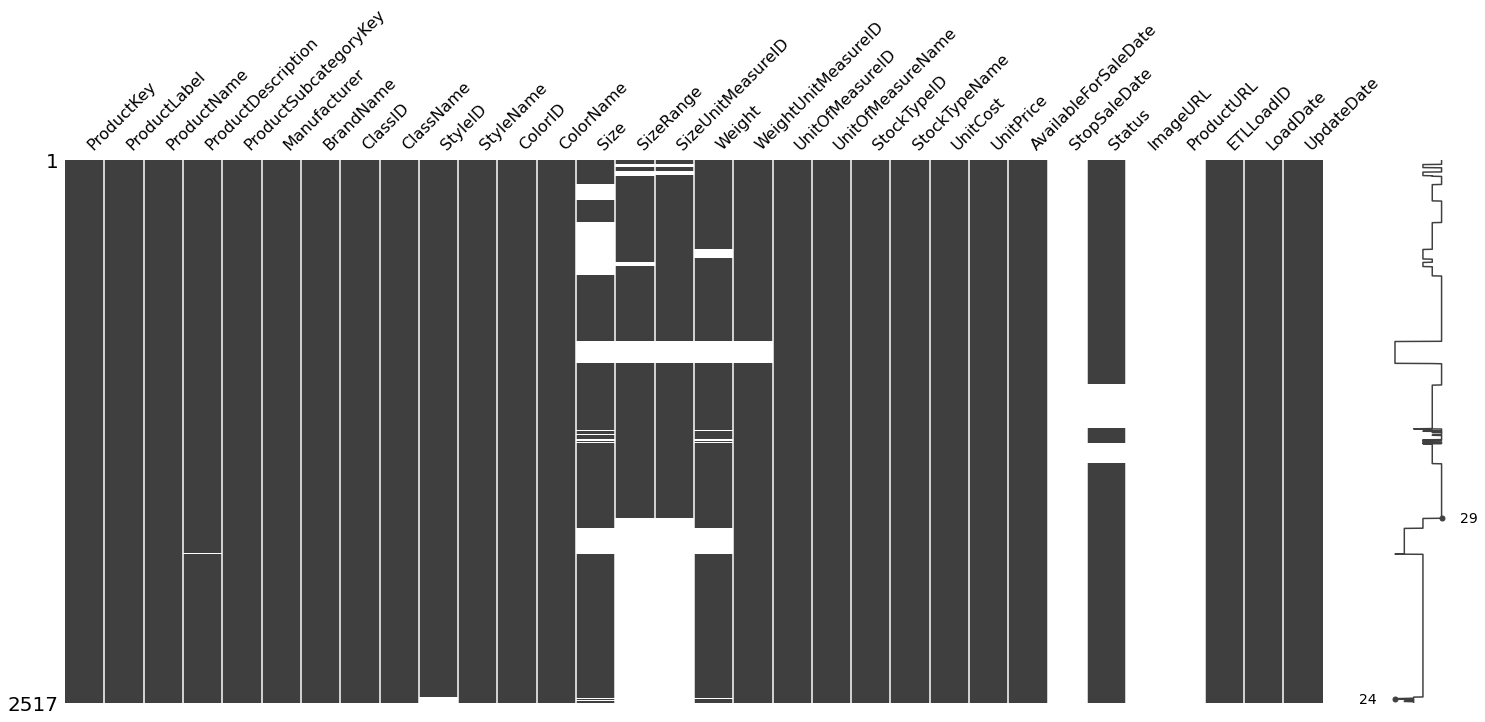

In [8]:
msno.matrix(products)

PRODUCTS SUBCATEGORIES

In [9]:
prodSubCat.head()

,ProductSubcategoryKey,ProductSubcategoryLabel,ProductSubcategoryName,ProductSubcategoryDescription,ProductCategoryKey,ETLLoadID,LoadDate,UpdateDate
0,1,0101,MP4&MP3,MP4&MP3,1,1,2009-07-07,2009-07-07
1,2,0102,Recorder,Recorder,1,1,2009-07-07,2009-07-07
2,3,0103,Radio,Radio,1,1,2009-07-07,2009-07-07
3,4,0104,Recording Pen,Recording Pen,1,1,2009-07-07,2009-07-07
4,5,0105,Headphones,Headphones,1,1,2009-07-07,2009-07-07


In [10]:
prodSubCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ProductSubcategoryKey          44 non-null     int64         
 1   ProductSubcategoryLabel        44 non-null     object        
 2   ProductSubcategoryName         44 non-null     object        
 3   ProductSubcategoryDescription  44 non-null     object        
 4   ProductCategoryKey             44 non-null     int64         
 5   ETLLoadID                      44 non-null     int64         
 6   LoadDate                       44 non-null     datetime64[ns]
 7   UpdateDate                     44 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 2.9+ KB


PRODUCT CATEGORY

In [11]:
prodCat.head()

,ProductCategoryKey,ProductCategoryLabel,ProductCategoryName,ProductCategoryDescription,ETLLoadID,LoadDate,UpdateDate
0,1,01,Audio,Audio,1,2009-07-07,2009-07-07
1,2,02,TV and Video,TV and Video,1,2009-07-07,2009-07-07
2,3,03,Computers,Computers,1,2009-07-07,2009-07-07
3,4,04,Cameras and camcorders,Cameras and camcorders,1,2009-07-07,2009-07-07
4,5,05,Cell phones,Cell phones,1,2009-07-07,2009-07-07


In [12]:
prodCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ProductCategoryKey          8 non-null      int64         
 1   ProductCategoryLabel        8 non-null      object        
 2   ProductCategoryName         8 non-null      object        
 3   ProductCategoryDescription  8 non-null      object        
 4   ETLLoadID                   8 non-null      int64         
 5   LoadDate                    8 non-null      datetime64[ns]
 6   UpdateDate                  8 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 576.0+ bytes


SALES

In [13]:
sales.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,CurrencyKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount,ETLLoadID,LoadDate,UpdateDate
0,1,2007-01-02,1,209,956,10,1,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400,1,2010-01-01,2010-01-01
1,2,2007-02-12,4,308,766,2,1,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605,1,2010-01-01,2010-01-01
2,3,2008-01-24,1,156,1175,11,1,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500,1,2010-01-01,2010-01-01
3,4,2008-01-13,2,306,1429,10,1,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200,1,2010-01-01,2010-01-01
4,5,2008-01-22,2,306,1133,10,1,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080,1,2010-01-01,2010-01-01


In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406089 entries, 0 to 3406088
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   SalesKey          int64         
 1   DateKey           datetime64[ns]
 2   channelKey        int64         
 3   StoreKey          int64         
 4   ProductKey        int64         
 5   PromotionKey      int64         
 6   CurrencyKey       int64         
 7   UnitCost          float64       
 8   UnitPrice         float64       
 9   SalesQuantity     int64         
 10  ReturnQuantity    int64         
 11  ReturnAmount      float64       
 12  DiscountQuantity  int64         
 13  DiscountAmount    float64       
 14  TotalCost         float64       
 15  SalesAmount       float64       
 16  ETLLoadID         int64         
 17  LoadDate          datetime64[ns]
 18  UpdateDate        datetime64[ns]
dtypes: datetime64[ns](3), float64(6), int64(10)
memory usage: 493.7 MB


<AxesSubplot:>

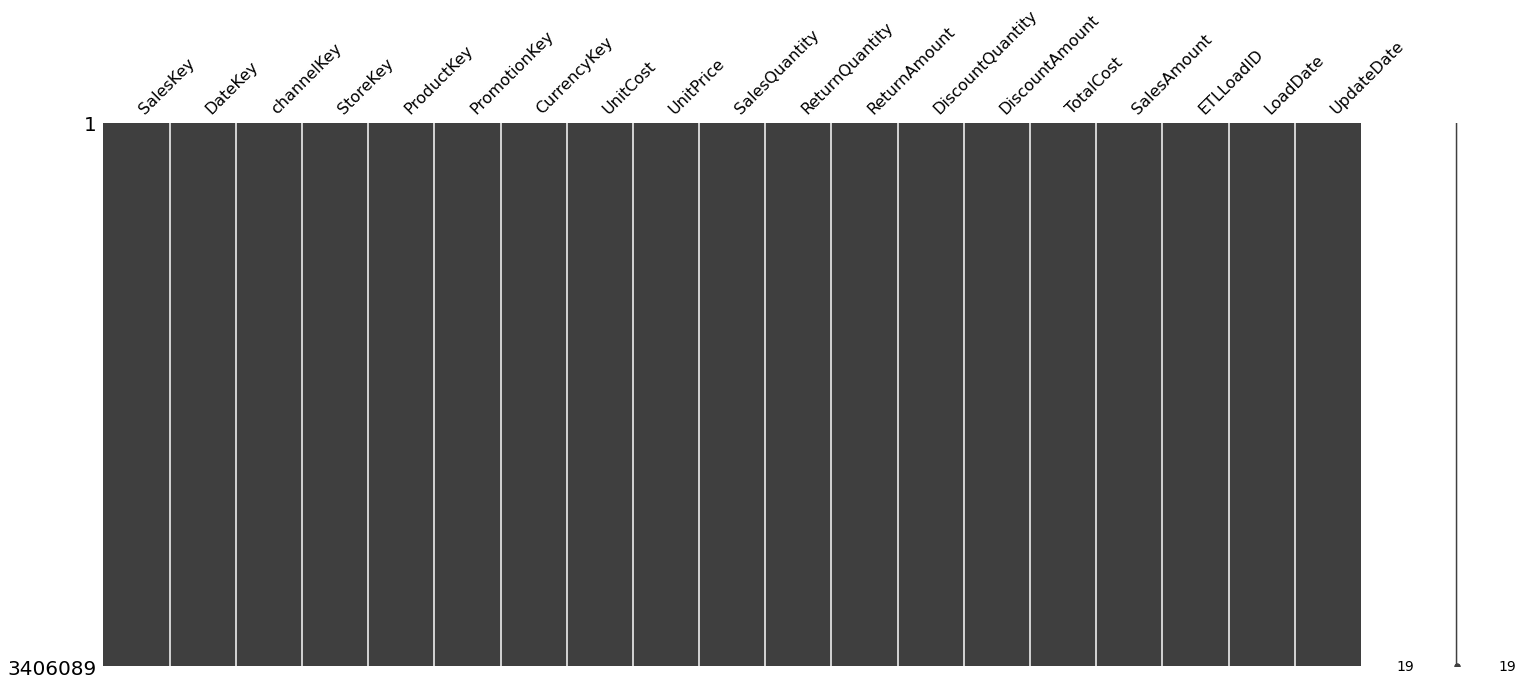

In [15]:
msno.matrix(sales)

In [16]:
sales.isna().sum()

SalesKey            0
DateKey             0
channelKey          0
StoreKey            0
ProductKey          0
PromotionKey        0
CurrencyKey         0
UnitCost            0
UnitPrice           0
SalesQuantity       0
ReturnQuantity      0
ReturnAmount        0
DiscountQuantity    0
DiscountAmount      0
TotalCost           0
SalesAmount         0
ETLLoadID           0
LoadDate            0
UpdateDate          0
dtype: int64

Actions for data wrangling:
* Drop unnecesary columns
* Drop columns with too many missing values
* Define appropriate datatypes
* Try to impute values to the columns with some missing values
* For categorical values, check for typos
* For numerical values, check for strange number (ex.: outliers)
* Join subcategories and categories into product

## DATA WRANGLING

### 1. PRODUCTS

**DROP UNHELPFUL COLUMNS AND ROWS**

In [17]:
products.head()

,ProductKey,ProductLabel,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassID,ClassName,StyleID,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,1,0101001,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,1,...,6.62,12.99,2005-05-03,None,On,None,None,1,2008-05-25 08:01:12,2008-05-25 08:01:12
1,2,0101002,Contoso 512MB MP3 Player E51 Blue,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,5,...,6.62,12.99,2005-05-03,None,On,None,None,1,2008-05-26 08:01:12,2008-05-26 08:01:12
2,3,0101003,Contoso 1G MP3 Player E100 White,1GB flash memory and USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,1,...,7.40,14.52,2006-05-13,None,On,None,None,1,2008-05-27 08:01:12,2008-05-27 08:01:12
3,4,0101004,Contoso 2G MP3 Player E200 Silver,"2GB flash memory, LCD display, plays MP3 and WMA",1,"Contoso, Ltd",Contoso,1,Economy,1,...,11.00,21.57,2006-12-16,None,On,None,None,1,2008-05-28 08:01:12,2008-05-28 08:01:12
4,5,0101005,Contoso 2G MP3 Player E200 Red,"2GB flash memory, LCD display, plays MP3 and WMA",1,"Contoso, Ltd",Contoso,1,Economy,1,...,11.00,21.57,2006-12-17,None,On,None,None,1,2008-05-29 08:01:12,2008-05-29 08:01:12


In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             2517 non-null   int64         
 1   ProductLabel           2517 non-null   object        
 2   ProductName            2517 non-null   object        
 3   ProductDescription     2516 non-null   object        
 4   ProductSubcategoryKey  2517 non-null   int64         
 5   Manufacturer           2517 non-null   object        
 6   BrandName              2517 non-null   object        
 7   ClassID                2517 non-null   object        
 8   ClassName              2517 non-null   object        
 9   StyleID                2487 non-null   object        
 10  StyleName              2517 non-null   object        
 11  ColorID                2517 non-null   object        
 12  ColorName              2517 non-null   object        
 13  Siz

In [19]:
products.drop(['ProductLabel','ClassID','StyleID','ColorID','Size','SizeRange','SizeUnitMeasureID','Weight','WeightUnitMeasureID',\
                'UnitOfMeasureID','UnitOfMeasureName','StockTypeID','ImageURL','ProductURL','ETLLoadID','LoadDate','UpdateDate','StopSaleDate',
                'AvailableForSaleDate','StyleName'],axis=1, inplace=True)

In [20]:
products.head()

,ProductKey,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassName,ColorName,StockTypeName,UnitCost,UnitPrice,Status
0,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,High,6.62,12.99,On
1,2,Contoso 512MB MP3 Player E51 Blue,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Blue,High,6.62,12.99,On
2,3,Contoso 1G MP3 Player E100 White,1GB flash memory and USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,White,Mid,7.40,14.52,On
3,4,Contoso 2G MP3 Player E200 Silver,"2GB flash memory, LCD display, plays MP3 and WMA",1,"Contoso, Ltd",Contoso,Economy,Silver,Mid,11.00,21.57,On
4,5,Contoso 2G MP3 Player E200 Red,"2GB flash memory, LCD display, plays MP3 and WMA",1,"Contoso, Ltd",Contoso,Economy,Red,Mid,11.00,21.57,On


**HANDLE MISSING VALUES**

In [21]:
products.isna().sum()

ProductKey                 0
ProductName                0
ProductDescription         1
ProductSubcategoryKey      0
Manufacturer               0
BrandName                  0
ClassName                  0
ColorName                  0
StockTypeName              0
UnitCost                   0
UnitPrice                  0
Status                   295
dtype: int64

Product Description: replace NaN with "No description available"

In [22]:
products['ProductDescription'] = products['ProductDescription'].fillna('No description available')

Status

Check the values

In [23]:
products['Status'].value_counts()

On    2222
Name: Status, dtype: int64

It's not helpful, we can drop it

In [24]:
products.drop('Status', axis=1, inplace=True)

**CHECK FOR TYPOS IN CATEGORICAL DATA**

In [25]:
print('Manufacturer')
print(products['Manufacturer'].value_counts().sort_index())
print("")

print('Brand')
print(products['BrandName'].value_counts().sort_index())
print("")

print('Class')
print(products['ClassName'].value_counts().sort_index())
print("")

print('Color')
print(products['ColorName'].value_counts().sort_index())
print("")

print('Stock Type')
print(products['StockTypeName'].value_counts().sort_index())
print("")

Manufacturer
A. Datum Corporation    132
Adventure Works         192
Contoso, Ltd            710
Fabrikam, Inc.          267
Litware, Inc.           264
Northwind Traders        47
Proseware, Inc.         244
Southridge Video        192
Tailspin Toys           144
The Phone Company       152
Wide World Importers    173
Name: Manufacturer, dtype: int64

Brand
A. Datum                132
Adventure Works         191
Adventure Works           1
Contoso                 644
Contoso                  66
Fabrikam                195
Fabrikam                 72
Litware                 228
Litware                  36
Northwind Traders        47
Proseware               244
Southridge Video        192
Tailspin Toys           144
The Phone Company       152
Wide World Importers    173
Name: BrandName, dtype: int64

Class
Deluxe      360
Economy     882
Regular    1275
Name: ClassName, dtype: int64

Color
Azure           14
Black          602
Blue           197
Brown           77
Gold            50
Gr

Brand and color columns have duplicated values (Blue/blue, Adventure Works)
Let's remove leading and trailing spaces, and capitalize the values

In [26]:
products['BrandName'] = products['BrandName'].str.strip().str.title()
products['ColorName'] = products['ColorName'].str.strip().str.title()

Verify

In [27]:
print('Brand')
print(products['BrandName'].value_counts().sort_index())
print("")

print('Color')
print(products['ColorName'].value_counts().sort_index())
print("")

Brand
A. Datum                132
Adventure Works         192
Contoso                 710
Fabrikam                267
Litware                 264
Northwind Traders        47
Proseware               244
Southridge Video        192
Tailspin Toys           144
The Phone Company       152
Wide World Importers    173
Name: BrandName, dtype: int64

Color
Azure           14
Black          602
Blue           200
Brown           77
Gold            50
Green           74
Grey           283
Orange          55
Pink            84
Purple           6
Red             99
Silver         417
Silver Grey     14
Transparent      1
White          505
Yellow          36
Name: ColorName, dtype: int64



**DEFINE THE APPROPRIATE DATA TYPES**

In [28]:
products.dtypes

ProductKey                 int64
ProductName               object
ProductDescription        object
ProductSubcategoryKey      int64
Manufacturer              object
BrandName                 object
ClassName                 object
ColorName                 object
StockTypeName             object
UnitCost                 float64
UnitPrice                float64
dtype: object

Convert to categorical:
* Manufacturer
* BrandName
* ClassName
* ColorName
* StockTypeName

In [29]:
products['Manufacturer'] = products['Manufacturer'].astype('category')
products['BrandName'] = products['BrandName'].astype('category')
products['ClassName'] = products['ClassName'].astype('category')
products['ColorName'] = products['ColorName'].astype('category')
products['StockTypeName'] = products['StockTypeName'].astype('category')

In [30]:
products.dtypes

ProductKey                  int64
ProductName                object
ProductDescription         object
ProductSubcategoryKey       int64
Manufacturer             category
BrandName                category
ClassName                category
ColorName                category
StockTypeName            category
UnitCost                  float64
UnitPrice                 float64
dtype: object

**CHECK FOR ABNORMAL NUMERICAL VALUES**

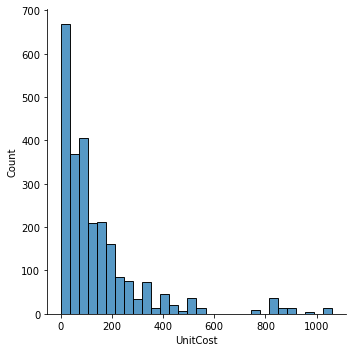

In [31]:
sns.displot(products['UnitCost'], bins=30)

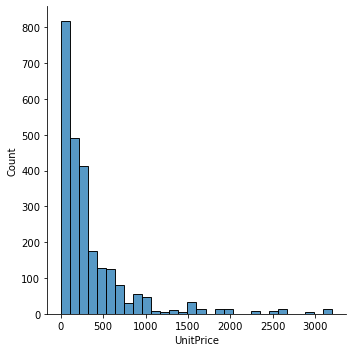

In [32]:
sns.displot(products['UnitPrice'], bins=30)

### 2. SUBCATEGORIES

**DROP UNHELPFUL COLUMNS AND ROWS**

In [33]:
prodSubCat.drop(['ProductSubcategoryLabel','ETLLoadID','LoadDate','UpdateDate'], axis=1, inplace=True)

In [34]:
prodSubCat.head()

,ProductSubcategoryKey,ProductSubcategoryName,ProductSubcategoryDescription,ProductCategoryKey
0,1,MP4&MP3,MP4&MP3,1
1,2,Recorder,Recorder,1
2,3,Radio,Radio,1
3,4,Recording Pen,Recording Pen,1
4,5,Headphones,Headphones,1


There should not be any duplicated Key

In [35]:
prodSubCat.duplicated(subset='ProductSubcategoryKey').sum()

0

**CHECK FOR TYPOS IN CATEGORICAL DATA**

In [36]:
prodSubCat['ProductSubcategoryName'].value_counts().sort_index()

Air Conditioners                    1
Audio Accessories                   1
Audio Books                         1
Bluetooth Headphones                1
Boxed Games                         1
Camcorders                          1
Cameras & Camcorders Accessories    1
Car Video                           1
Cell phones Accessories             1
Coffee Machines                     1
Computer Setup & Service            1
Computers Accessories               1
Desktops                            1
Digital Cameras                     1
Digital SLR Cameras                 1
Download Games                      1
Fans                                1
Film Cameras                        1
Games Accessories                   1
Headphones                          1
Home & Office Phones                1
Home Theater System                 1
Lamps                               1
Laptops                             1
MP4&MP3                             1
Microwaves                          1
Monitors    

In [37]:
prodSubCat['ProductSubcategoryName'] = prodSubCat['ProductSubcategoryName'].astype('category')

### 3. CATEGORIES

**DROP UNHELPFUL COLUMNS AND ROWS**

In [38]:
prodCat.drop(['ProductCategoryLabel','ETLLoadID','LoadDate','UpdateDate'], axis=1, inplace=True)

In [39]:
prodCat.head()

,ProductCategoryKey,ProductCategoryName,ProductCategoryDescription
0,1,Audio,Audio
1,2,TV and Video,TV and Video
2,3,Computers,Computers
3,4,Cameras and camcorders,Cameras and camcorders
4,5,Cell phones,Cell phones


There should not be any duplicated Key

In [40]:
prodCat.duplicated(subset='ProductCategoryKey').sum()

0

**CHECK FOR TYPOS IN CATEGORICAL VARIABLES**

In [41]:
prodCat['ProductCategoryName'].value_counts().sort_index()

Audio                            1
Cameras and camcorders           1
Cell phones                      1
Computers                        1
Games and Toys                   1
Home Appliances                  1
Music, Movies and Audio Books    1
TV and Video                     1
Name: ProductCategoryName, dtype: int64

In [42]:
prodCat['ProductCategoryName'] = prodCat['ProductCategoryName'].astype('category')

**MERGE SUBCATEGORIES AND CATEGORIES INTO PRODUCTS**

First, categories with subcategories

In [43]:
prodSubCat = prodSubCat.merge(prodCat, how='left', on='ProductCategoryKey').drop('ProductCategoryKey', axis=1)
prodSubCat.head()

,ProductSubcategoryKey,ProductSubcategoryName,ProductSubcategoryDescription,ProductCategoryName,ProductCategoryDescription
0,1,MP4&MP3,MP4&MP3,Audio,Audio
1,2,Recorder,Recorder,Audio,Audio
2,3,Radio,Radio,Audio,Audio
3,4,Recording Pen,Recording Pen,Audio,Audio
4,5,Headphones,Headphones,Audio,Audio


Then, the new dataframe with Products

In [44]:
products = products.merge(prodSubCat, how='left', on='ProductSubcategoryKey').drop('ProductSubcategoryKey', axis=1)
products.head()

,ProductKey,ProductName,ProductDescription,Manufacturer,BrandName,ClassName,ColorName,StockTypeName,UnitCost,UnitPrice,ProductSubcategoryName,ProductSubcategoryDescription,ProductCategoryName,ProductCategoryDescription
0,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,"Contoso, Ltd",Contoso,Economy,Silver,High,6.62,12.99,MP4&MP3,MP4&MP3,Audio,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,512MB USB driver plays MP3 and WMA,"Contoso, Ltd",Contoso,Economy,Blue,High,6.62,12.99,MP4&MP3,MP4&MP3,Audio,Audio
2,3,Contoso 1G MP3 Player E100 White,1GB flash memory and USB driver plays MP3 and WMA,"Contoso, Ltd",Contoso,Economy,White,Mid,7.40,14.52,MP4&MP3,MP4&MP3,Audio,Audio
3,4,Contoso 2G MP3 Player E200 Silver,"2GB flash memory, LCD display, plays MP3 and WMA","Contoso, Ltd",Contoso,Economy,Silver,Mid,11.00,21.57,MP4&MP3,MP4&MP3,Audio,Audio
4,5,Contoso 2G MP3 Player E200 Red,"2GB flash memory, LCD display, plays MP3 and WMA","Contoso, Ltd",Contoso,Economy,Red,Mid,11.00,21.57,MP4&MP3,MP4&MP3,Audio,Audio


We can get rid of the descriptions too

In [45]:
products.drop(['ProductDescription','ProductSubcategoryDescription','ProductCategoryDescription'], axis=1, inplace=True)

Finally, rename the columns' names

In [46]:
products.rename({'ProductName':'Product','BrandName':'Brand','ClassName':'Class','ColorName':'Color','StockTypeName':'StockType','ProductSubcategoryName':'SubCategory','ProductCategoryName':'Category'}, axis=1, inplace=True)

In [47]:
products.head()

,ProductKey,Product,Manufacturer,Brand,Class,Color,StockType,UnitCost,UnitPrice,SubCategory,Category
0,1,Contoso 512MB MP3 Player E51 Silver,"Contoso, Ltd",Contoso,Economy,Silver,High,6.62,12.99,MP4&MP3,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",Contoso,Economy,Blue,High,6.62,12.99,MP4&MP3,Audio
2,3,Contoso 1G MP3 Player E100 White,"Contoso, Ltd",Contoso,Economy,White,Mid,7.40,14.52,MP4&MP3,Audio
3,4,Contoso 2G MP3 Player E200 Silver,"Contoso, Ltd",Contoso,Economy,Silver,Mid,11.00,21.57,MP4&MP3,Audio
4,5,Contoso 2G MP3 Player E200 Red,"Contoso, Ltd",Contoso,Economy,Red,Mid,11.00,21.57,MP4&MP3,Audio


In [48]:
del prodSubCat, prodCat

### 4. SALES

**DROP UNHELPFUL COLUMNS AND ROWS**

In [49]:
sales.drop(['SalesKey','channelKey','StoreKey','PromotionKey','CurrencyKey','ETLLoadID','LoadDate','UpdateDate'], axis=1, inplace=True)

In [50]:

sales.head()

,DateKey,ProductKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,DiscountQuantity,DiscountAmount,TotalCost,SalesAmount
0,2007-01-02,956,91.05,198.0,8,0,0.0,1,39.600,728.40,1544.400
1,2007-02-12,766,10.15,19.9,4,0,0.0,1,0.995,40.60,78.605
2,2008-01-24,1175,209.03,410.0,9,0,0.0,3,61.500,1881.27,3628.500
3,2008-01-13,1429,132.90,289.0,8,0,0.0,1,57.800,1063.20,2254.200
4,2008-01-22,1133,144.52,436.2,24,0,0.0,3,261.720,3468.48,10207.080


We will only keep the Gross Sales (Qty * unitPrice), the Total Cost and the Utility (Rename SalesAmount)

Add the Gross Sales column

In [51]:
sales['GrossSales'] = sales['UnitPrice'] * sales['SalesQuantity']

In [52]:
sales.drop(['UnitCost','UnitPrice','SalesQuantity','ReturnQuantity','ReturnAmount','DiscountQuantity','DiscountAmount'],axis=1, inplace=True)

In [53]:
sales.rename({'SalesAmount':'Utility'}, axis=1, inplace=True)

In [54]:
# Reorder the columns
sales = sales[['DateKey','ProductKey','GrossSales','TotalCost','Utility']]

In [55]:
sales.head()

,DateKey,ProductKey,GrossSales,TotalCost,Utility
0,2007-01-02,956,1584.0,728.40,1544.400
1,2007-02-12,766,79.6,40.60,78.605
2,2008-01-24,1175,3690.0,1881.27,3628.500
3,2008-01-13,1429,2312.0,1063.20,2254.200
4,2008-01-22,1133,10468.8,3468.48,10207.080


**DEFINE THE APPROPRIATE DATA TYPES**

In [56]:
sales['DateKey'] = pd.to_datetime(sales['DateKey'])

**JOIN SALES AND PRODUCT**

In [57]:
products.head()

,ProductKey,Product,Manufacturer,Brand,Class,Color,StockType,UnitCost,UnitPrice,SubCategory,Category
0,1,Contoso 512MB MP3 Player E51 Silver,"Contoso, Ltd",Contoso,Economy,Silver,High,6.62,12.99,MP4&MP3,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,"Contoso, Ltd",Contoso,Economy,Blue,High,6.62,12.99,MP4&MP3,Audio
2,3,Contoso 1G MP3 Player E100 White,"Contoso, Ltd",Contoso,Economy,White,Mid,7.40,14.52,MP4&MP3,Audio
3,4,Contoso 2G MP3 Player E200 Silver,"Contoso, Ltd",Contoso,Economy,Silver,Mid,11.00,21.57,MP4&MP3,Audio
4,5,Contoso 2G MP3 Player E200 Red,"Contoso, Ltd",Contoso,Economy,Red,Mid,11.00,21.57,MP4&MP3,Audio


In [58]:
sales = sales.merge(products, how='left', on='ProductKey').drop('ProductKey', axis=1)

In [59]:
sales.head()

,DateKey,GrossSales,TotalCost,Utility,Product,Manufacturer,Brand,Class,Color,StockType,UnitCost,UnitPrice,SubCategory,Category
0,2007-01-02,1584.0,728.40,1544.400,A. Datum Point Shoot Digital Camera M500 Black,A. Datum Corporation,A. Datum,Regular,Black,High,91.05,198.0,Digital Cameras,Cameras and camcorders
1,2007-02-12,79.6,40.60,78.605,Contoso Battery charger - bike E200 Black,"Contoso, Ltd",Contoso,Economy,Black,High,10.15,19.9,Computers Accessories,Computers
2,2008-01-24,3690.0,1881.27,3628.500,Fabrikam Budget Moviemaker 2/3'' 17mm E100 White,"Fabrikam, Inc.",Fabrikam,Regular,White,Low,209.03,410.0,Camcorders,Cameras and camcorders
3,2008-01-13,2312.0,1063.20,2254.200,The Phone Company Touch Screen Phones 4-Wire/O...,The Phone Company,The Phone Company,Regular,Grey,High,132.90,289.0,Touch Screen Phones,Cell phones
4,2008-01-22,10468.8,3468.48,10207.080,"Fabrikam SLR Camera 35"" X358 Blue","Fabrikam, Inc.",Fabrikam,Regular,Blue,High,144.52,436.2,Digital SLR Cameras,Cameras and camcorders


The data is clean, the analysis can be performed now

Before starting the analysis, we can enrich the data with date variables: year, month, day, weekday

In [60]:
sales['Year'] = sales['DateKey'].dt.year.astype('category')
sales['Month'] = sales['DateKey'].dt.month_name().astype('category')
sales['Day'] = sales['DateKey'].dt.day.astype('category')
sales['WeekDay'] = sales['DateKey'].dt.day_name().astype('category')

For Month and Weekday, we need to validate the correct order of the categories

In [61]:
sales['Month'].cat.reorder_categories(['January','February','March','April','May','June','July','August','September','October','November','December'], inplace=True)
sales['Month'].cat.rename_categories({'January':'Jan','February':'Feb','March':'Mar','April':'Apr','May':'May','June':'Jun','July':'Jul',\
                                        'August':'Aug','September':'Sep','October':'Oct','November':'Nov','December':'Dec'}, inplace=True)

In [62]:
sales['WeekDay'].cat.reorder_categories(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], inplace=True)

## DATA ANALYSIS

### 1. HOW IS THIS YEAR UTILITY COMPARED TO PREVIOUS YEARS?

Plot based on [this](https://lost-stats.github.io/Presentation/Figures/line_graph_with_labels_at_the_beginning_or_end.html) article

Text(0.5, 1.0, 'Utility has increased compared to previous years.\nAt the end of the year, utility was a little bit lower than previous year')

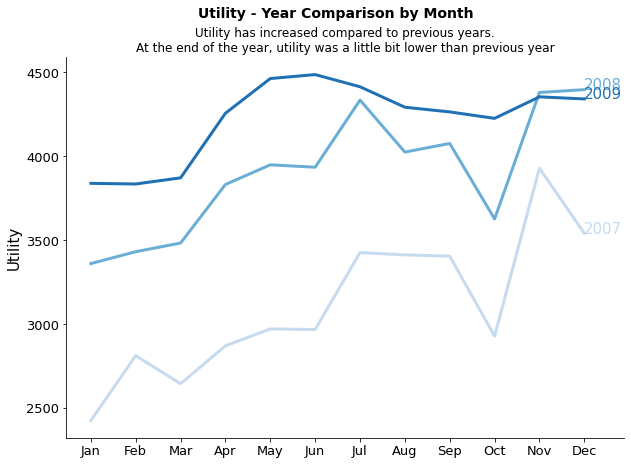

In [163]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data=sales, x='Month', y='Utility', hue='Year', ax=ax, ci=None, legend=None, linewidth=3, palette='Blues')

for line, name in zip(ax.lines, sales['Year'].cat.categories.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue
    
    text = ax.annotate(name,xy=(x, y),xytext=(0, 0),color=line.get_color(),xycoords=(ax.get_xaxis_transform(),ax.get_yaxis_transform()),textcoords="offset points", size=15)
    text_width = (text.get_window_extent(fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)

    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

ax.set_xlabel('')
ax.set_ylabel('Utility',fontsize=15)
ax.tick_params(labelsize=13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Utility - Year Comparison by Month', size=14, weight='bold')
plt.title('Utility has increased compared to previous years.\nAt the end of the year, utility was a little bit lower than previous year')

### 2. HOW DO SALES VARY ACCORDING TO DAY AND MONTH?


In [146]:
utilityDay = sales.groupby('WeekDay').agg({'Utility':np.mean})
utilityMonth = sales.groupby('Month').agg({'Utility':np.mean})

In [147]:
custom_palette = {}

for x in set(utilityMonth.index):
    if x == utilityMonth.idxmax().item():
       custom_palette[x] = '#00BFC4'
    elif x == utilityMonth.idxmin().item():
        custom_palette[x] = '#FF3D41'
    else:
        custom_palette[x] = '#D2D4DC'

Text(0.5, 0, '')

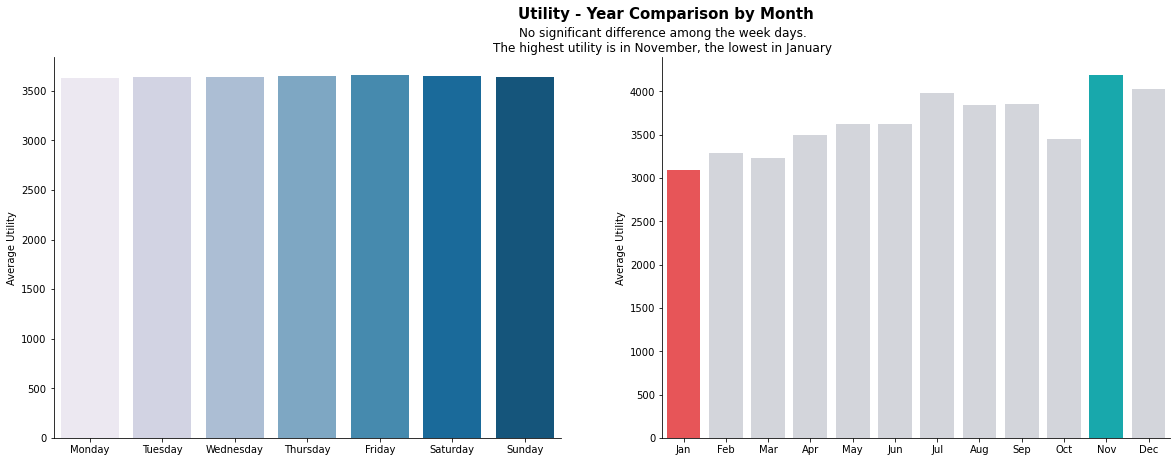

In [154]:
fig, ax = plt.subplots(figsize=(20,7), ncols=2)

sns.barplot(data=utilityDay, x=utilityDay.index, y='Utility', ax=ax[0], palette='PuBu')
sns.barplot(data=utilityMonth, x=utilityMonth.index, y='Utility', ax=ax[1], palette=custom_palette)
plt.suptitle('Utility - Year Comparison by Month', size=15, weight='bold', x=0.55)
plt.title('No significant difference among the week days.\nThe highest utility is in November, the lowest in January', x=0)

ax[0].set_ylabel('Average Utility')
ax[1].set_ylabel('Average Utility')
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].set_xlabel('')
ax[1].set_xlabel('')


### 3. HOW WAS THE PROFIT MARGIN FOR THE LAST YEAR?

In [67]:
SalesCost2009 = sales[sales['Year'] == 2009].groupby('Month').agg({'GrossSales':np.mean, 'TotalCost':np.mean, 'Utility':np.mean}).reset_index()

In [68]:
SalesCost2009 = pd.melt(SalesCost2009, value_vars=['GrossSales','TotalCost','Utility'], var_name='Metric', value_name='Amount', id_vars='Month')

In [172]:
SalesCost2009['Metric'] = SalesCost2009['Metric'].astype('category')

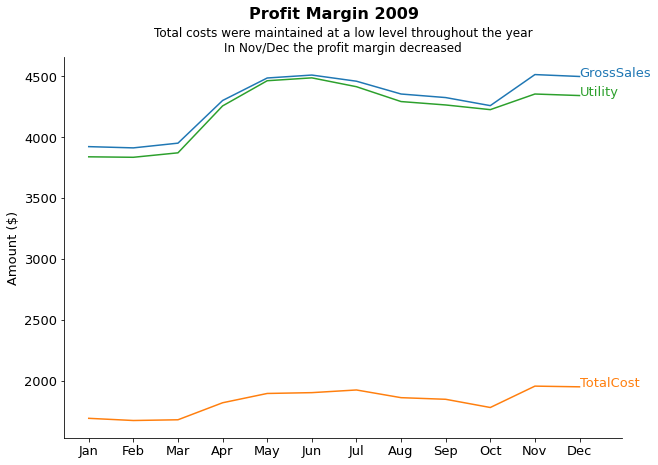

In [175]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data=SalesCost2009, x='Month', y='Amount', hue='Metric', legend=False)

ax.set_xlabel('')
ax.set_ylabel('Amount ($)',fontsize=13)
ax.tick_params(labelsize=13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Profit Margin 2009', size=16, weight='bold')
plt.title('Total costs were maintained at a low level throughout the year\nIn Nov/Dec the profit margin decreased', size=12)


for line, name in zip(ax.lines, SalesCost2009['Metric'].cat.categories.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue
    
    text = ax.annotate(name,xy=(x, y),xytext=(0, 0),color=line.get_color(),xycoords=(ax.get_xaxis_transform(),ax.get_yaxis_transform()),textcoords="offset points", size=13)
    text_width = (text.get_window_extent(fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)

    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

### 4. PRODUCT SALES ANALYSIS

In [71]:
utilityCategory = sales.groupby(['Year','Category']).agg({'Utility':np.mean}).reset_index()

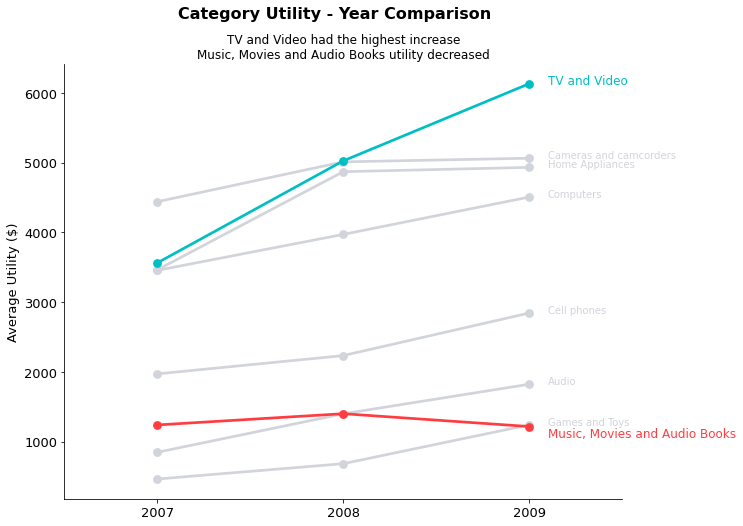

In [177]:
custom_palette = {}

for x in set(utilityCategory['Category']):
    if x == 'TV and Video':
       custom_palette[x] = '#00BFC4'
    elif x == 'Music, Movies and Audio Books':
        custom_palette[x] = '#FF3D41'
    else:
        custom_palette[x] = '#D2D4DC'

fig, ax = plt.subplots(figsize=(10,8))
sns.pointplot(data=utilityCategory, x='Year', y='Utility', hue='Category', palette=custom_palette)

ax.set_xlabel('')
ax.set_ylabel('Average Utility ($)',fontsize=13)
ax.tick_params(labelsize=13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.suptitle('Category Utility - Year Comparison', size=16, weight='bold')
plt.title('TV and Video had the highest increase\nMusic, Movies and Audio Books utility decreased', size=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

for c in utilityCategory['Category'].cat.categories.tolist():
    y = utilityCategory[(utilityCategory['Year']==2009) & (utilityCategory['Category']==c)]['Utility']
    if c == 'TV and Video':
        ax.text(x=2.1,y=y, s=c, color='#00BFC4', fontsize=12)
    elif c == 'Music, Movies and Audio Books':
        ax.text(x=2.1,y=y-150, s=c, color='#FF3D41', fontsize=12)
    else:
        ax.text(x=2.1,y=y, s=c, color='#D2D4DC')
    

ax.legend().set_visible(False)


### 5. WHICH BRANDS GENERATED THE MOST REVENUE IN 2009?

A treemap will be used to show the proportion of revenue generated by each brand

Code based on [this article](https://medium.com/geekculture/how-to-plot-a-treemap-in-python-48743061cfda)

In [205]:
brands2009 = sales[sales['Year'] == 2009].groupby('Brand').agg({'Utility':np.mean}).sort_values('Utility', ascending=False).reset_index()

In [201]:
import squarify
import matplotlib

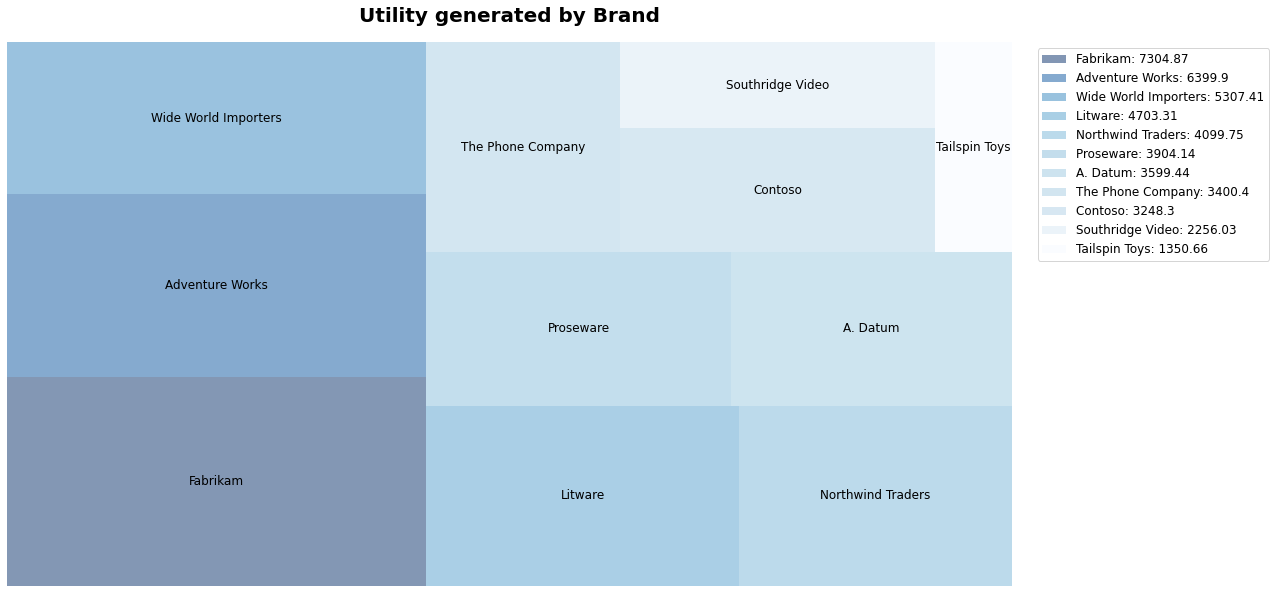

In [235]:
fig, ax = plt.subplots(figsize=(18,10))
cmap = matplotlib.cm.Blues
norm = matplotlib.colors.Normalize(vmin=brands2009.Utility.min(), vmax=brands2009.Utility.max())
colors = [cmap(norm(i)) for i in brands2009.Utility]

squarify.plot(sizes=brands2009['Utility'], label=brands2009['Brand'], alpha=0.5, color=colors, text_kwargs={'fontsize':12})
plt.title('Utility generated by Brand', fontsize=20, fontweight='bold', pad=20)
plt.axis('off')
tmapLabels = brands2009.apply(lambda x: str(x.Brand) + ': ' + str(round(x.Utility,2)), axis=1)
plt.legend(handles=ax.containers[0],labels=list(tmapLabels), bbox_to_anchor=(1.02,1), prop={'size': 12})